In [10]:
from sklearn import neighbors
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

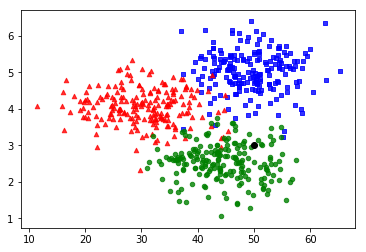

In [11]:
x1 = random.normal(50, 6, 200)
y1 = random.normal(5, 0.5, 200)

x2 = random.normal(30,6,200)
y2 = random.normal(4,0.5,200)

x3 = random.normal(45,6,200)
y3 = random.normal(2.5, 0.5, 200)

plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)
plt.scatter(x3,y3, c='g', s=20, alpha=0.8)

x = 50
y = 3
plt.scatter(50, 3, c='black')
plt.show()

In [12]:
labels = [1]*200 + [2]*200 + [3]*200
clf = neighbors.KNeighborsClassifier(5)
xs = np.concatenate([x1, x2, x3])
ys = np.concatenate([y1, y2, y3])
clf.fit(list(zip(xs, ys)), labels)
clf.predict([x,y])

/Users/pengfei/Code/ipython_notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([3])

## knn 实现

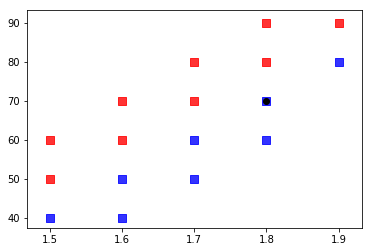

In [76]:
data = """
1.5 40 thin  
1.5 50 fat  
1.5 60 fat  
1.6 40 thin  
1.6 50 thin  
1.6 60 fat  
1.6 70 fat  
1.7 50 thin  
1.7 60 thin  
1.7 70 fat  
1.7 80 fat  
1.8 60 thin  
1.8 70 thin  
1.8 80 fat  
1.8 90 fat  
1.9 80 thin  
1.9 90 fat  
"""

ds = []
labels = []
for line in data.split('\n'):
    tokens = line.strip().split(' ')  
    eles = [float(tk) for tk in tokens[:-1]]
    if eles:
        ds.append(eles) 
        labels.append(tokens[-1].strip()) 
        
c1 = [ds[i] for i in range(len(labels)) if labels[i] == 'thin']
c2 = [ds[i] for i in range(len(labels)) if labels[i] == 'fat']

plt.scatter([c[0] for c in c1], [c[1] for c in c1], c='b',marker='s',s=50,alpha=0.8)
plt.scatter([c[0] for c in c2], [c[1] for c in c2], c='r',marker='s',s=50,alpha=0.8)

x = 1.8
y = 70
plt.scatter(x, y, c='black')

plt.show()

In [77]:
import operator
from numpy import tile

x = np.array(ds)
y = np.array(labels)

dataSizeSet = x.shape[0]
diffMat = tile([1.8, 70], (dataSizeSet, 1)) - x
diffMat = diffMat ** 2
sqDistance = diffMat.sum(axis=1)
sqDistance = sqDistance ** 0.5
sortInOrder = sqDistance.argsort()
classCount = {}

for i in range(3):
    vl = labels[sortInOrder[i]]
    classCount[vl] = classCount.get(vl, 0) + 1
    
sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
print(sortedClassCount[0][0])

fat
